# Programul realizeaza reprezentarea grafica a doua fisiere audio, convolutia celor doua semnale si crearea unui nou fisier audio din semnalul rezultat.

In [1]:
from scipy.io import wavfile
import utility as util
import IPython.display as ipd
import librosa.util as lib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Primul fisier audio.

In [2]:
ipd.Audio('gun_shot.wav')

rata esantionare = 44100 Hz, lungime = 203664 esantioane, canale = 2
[[ 93  22]
 [ 95  22]
 [ 96  17]
 ...
 [  4 -16]
 [ -1 -12]
 [  4 -12]]


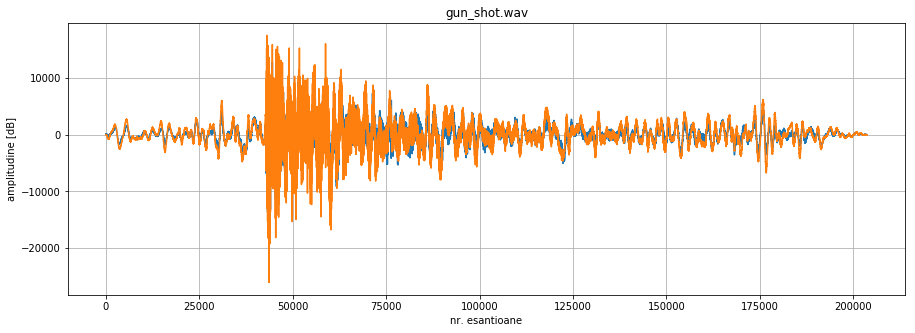

In [3]:
samp_gun, gun=wavfile.read('gun_shot.wav')
print('rata esantionare = {} Hz, lungime = {} esantioane, canale = {}'.format(samp_gun, *gun.shape))
print(gun)
plt.figure(figsize=(15,5))
plt.title('gun_shot.wav')
plt.xlabel('nr. esantioane')
plt.ylabel('amplitudine [dB]')
plt.plot(gun)
plt.grid(True)

Pentru a putea prelucra semnalul trebuie sa transformam esantioanele in numere reale din numere intregi si sa-l normalizam, adica amplitudinea esantioanelor sa fie intre -1 si 1.

vechiul tip de date: int16
noul tip de date: float32
[[ 2.838e-03  6.714e-04]
 [ 2.899e-03  6.714e-04]
 [ 2.930e-03  5.188e-04]
 ...
 [ 1.221e-04 -4.883e-04]
 [-3.052e-05 -3.662e-04]
 [ 1.221e-04 -3.662e-04]]


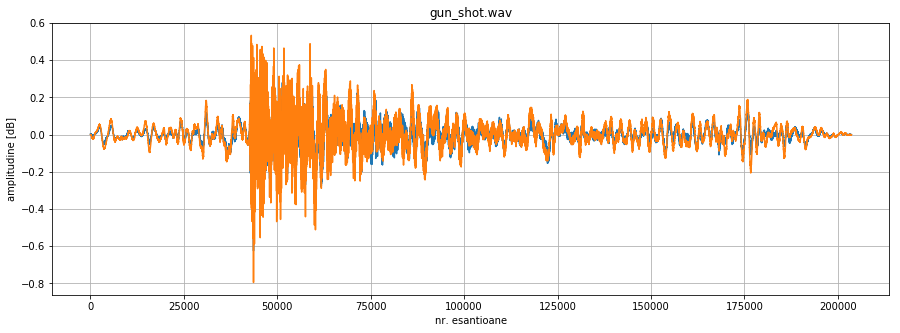

In [4]:
print("vechiul tip de date: {}".format(gun.dtype))
normalized_gun = util.pcm2float(gun, 'float32')
print("noul tip de date: {}".format(normalized_gun.dtype))
np.set_printoptions(precision=3)
print(normalized_gun)
plt.figure(figsize=(15,5))
plt.title('gun_shot.wav')
plt.xlabel('nr. esantioane')
plt.ylabel('amplitudine [dB]')
plt.plot(normalized_gun)
plt.grid(True)

## Al doilea fisier audio.

In [5]:
ipd.Audio('violin.wav')

rata esantionare = 44100 Hz, lungime = 373374 esantioane, canale = 2
[[-13 -35]
 [ -5 -19]
 [ 12 -16]
 ...
 [  2  -3]
 [ -1   4]
 [ -1  -4]]


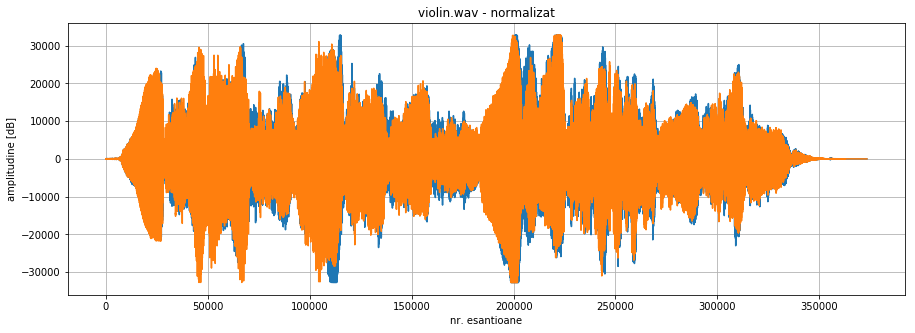

In [6]:
samp_violin, violin=wavfile.read('violin.wav')
print('rata esantionare = {} Hz, lungime = {} esantioane, canale = {}'.format(samp_violin, *violin.shape))
print(violin)
plt.figure(figsize=(15,5))
plt.title('violin.wav - normalizat')
plt.xlabel('nr. esantioane')
plt.ylabel('amplitudine [dB]')
plt.plot(violin)
plt.grid(True)

vechiul tip de date: int16
noul tip de date: float32
[[-3.967e-04 -1.068e-03]
 [-1.526e-04 -5.798e-04]
 [ 3.662e-04 -4.883e-04]
 ...
 [ 6.104e-05 -9.155e-05]
 [-3.052e-05  1.221e-04]
 [-3.052e-05 -1.221e-04]]


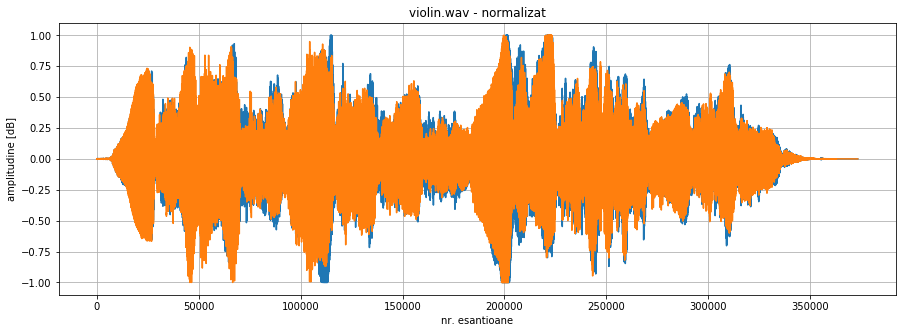

In [7]:
print("vechiul tip de date: {}".format(violin.dtype))
normalized_violin = util.pcm2float(violin, 'float32')
print("noul tip de date: {}".format(normalized_violin.dtype))
np.set_printoptions(precision=3)
print(normalized_violin)
plt.figure(figsize=(15,5))
plt.title('violin.wav - normalizat')
plt.xlabel('nr. esantioane')
plt.ylabel('amplitudine [dB]')
plt.plot(normalized_violin)
plt.grid(True)

Cele doua semnale audio sunt in format dual channel. De aceea in lista esantioanelor sunt perechi de liste (un fel de matrice), primul element dintr-o pereche fiind esantionul pentru canalul 1, iar al doilea element esantionul pentru canalul 2. Pentru a putea face convolutia trebuie sa extragem elementele din matrice si sa facem cate o lista cu esantioanele pentru fiecare canal, iar apoi facem convolutia, pe rand, pentru fiecare canal in parte.

In [8]:
norm_gun_ch1=[el[0] for el in normalized_gun]
norm_gun_ch2=[el[1] for el in normalized_gun]
print(norm_gun_ch1[:10],'\n',norm_gun_ch2[:10])

[0.0028381348, 0.00289917, 0.0029296875, 0.0027770996, 0.0028076172, 0.0027160645, 0.0025939941, 0.0025939941, 0.0025634766, 0.0026245117] 
 [0.0006713867, 0.0006713867, 0.0005187988, 0.00064086914, 0.000579834, 0.0007019043, 0.00061035156, 0.0005187988, 0.00061035156, 0.000579834]


In [9]:
norm_violin_ch1=[el[0] for el in normalized_violin]
norm_violin_ch2=[el[1] for el in normalized_violin]
print(norm_violin_ch1[:10],'\n',norm_violin_ch2[:10])

[-0.00039672852, -0.00015258789, 0.00036621094, -0.0004272461, -0.00033569336, -0.0009460449, -0.0006713867, -0.0006713867, 0.00076293945, 0.00064086914] 
 [-0.0010681152, -0.000579834, -0.00048828125, -0.000579834, -0.0011901855, -0.0009765625, -0.0013427734, -0.0006713867, 0.00039672852, 0.0005493164]


Convolutia pentru primul canal.

[-1.126e-06 -1.583e-06 -5.653e-07 ...  4.657e-09 -2.794e-09 -3.725e-09]


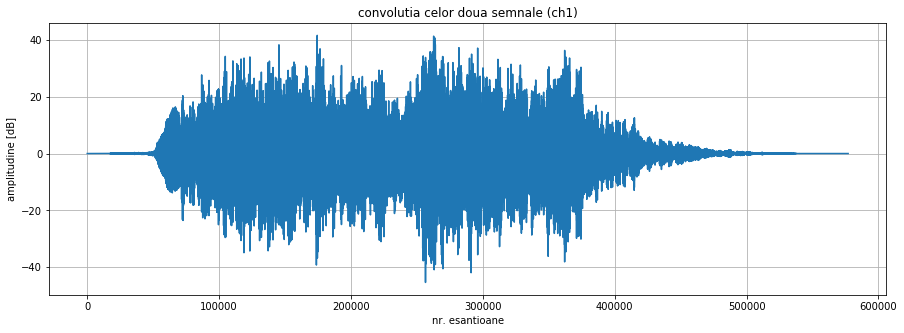

In [10]:
conv_sign_ch1= np.convolve(norm_violin_ch1,norm_gun_ch1,'full')
print(conv_sign_ch1)
plt.figure(figsize=(15,5))
plt.title('convolutia celor doua semnale (ch1)')
plt.xlabel('nr. esantioane')
plt.ylabel('amplitudine [dB]')
plt.plot(conv_sign_ch1)
plt.grid(True)

Convolutia pentru al doilea canal.

[-7.171e-07 -1.106e-06 -1.271e-06 ...  4.843e-08  0.000e+00  4.470e-08]


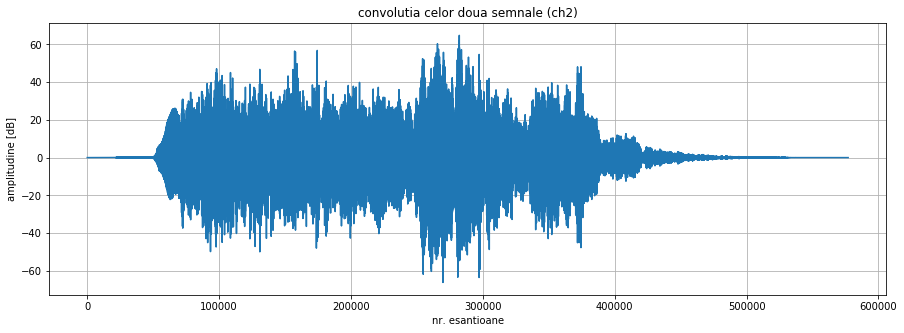

In [11]:
conv_sign_ch2= np.convolve(norm_violin_ch2,norm_gun_ch2,'full')
print(conv_sign_ch2)
plt.figure(figsize=(15,5))
plt.title('convolutia celor doua semnale (ch2)')
plt.xlabel('nr. esantioane')
plt.ylabel('amplitudine [dB]')
plt.plot(conv_sign_ch2)
plt.grid(True)

Dupa ce am facut convolutia pentru fiecare semnal in parte revenim la formatul cu 2 canale.

[[-1.126e-06 -7.171e-07]
 [-1.583e-06 -1.106e-06]
 [-5.653e-07 -1.271e-06]
 ...
 [ 4.657e-09  4.843e-08]
 [-2.794e-09  0.000e+00]
 [-3.725e-09  4.470e-08]]


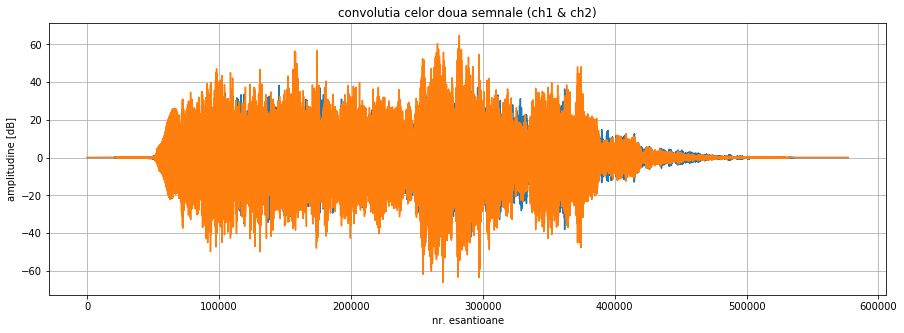

In [12]:
conv_sign=np.array([[ch1,ch2] for ch1,ch2 in zip(conv_sign_ch1,conv_sign_ch2)])
print(conv_sign)
plt.figure(figsize=(15,5))
plt.title('convolutia celor doua semnale (ch1 & ch2)')
plt.xlabel('nr. esantioane')
plt.ylabel('amplitudine [dB]')
plt.plot(conv_sign)
plt.grid(True)

Observam ca amplitudinea semnalului rezultat in urma convolutiei este intre (-60,60) dB, asta inseamna ca sunetul o sa fie foarte puternic. Trebuie normalizat semnalul, apoi putem salva fisierul audio.

[[-2.480e-08 -1.084e-08]
 [-3.487e-08 -1.672e-08]
 [-1.245e-08 -1.921e-08]
 ...
 [ 1.026e-10  7.318e-10]
 [-6.153e-11  0.000e+00]
 [-8.204e-11  6.755e-10]]


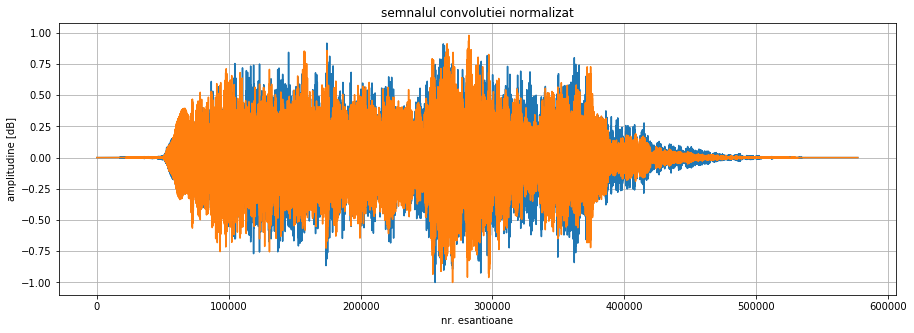

In [13]:
norm_conv_sign=lib.normalize(conv_sign)
print(norm_conv_sign)
plt.figure(figsize=(15,5))
plt.title('semnalul convolutiei normalizat')
plt.xlabel('nr. esantioane')
plt.ylabel('amplitudine [dB]')
plt.plot(norm_conv_sign)
plt.grid(True)

Salvam convolutia celor doua semnale in format '.wav'.

In [14]:
wavfile.write('conv-audio.wav', 44100, norm_conv_sign)

## Rezultatul convolutiei.

In [15]:
ipd.Audio('conv-audio.wav')

Bibliografie:

https://librosa.github.io/librosa/generated/librosa.util.normalize.html

https://musicinformationretrieval.com/ipython_audio.html

https://github.com/mgeier/python-audio/blob/master/audio-files/utility.py

https://nbviewer.jupyter.org/github/mgeier/python-audio/blob/master/audio-files/audio-files-with-scipy-io.ipynb

https://www.youtube.com/watch?v=0ALKGR0I5MA&t=583s